In [69]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

This model uses a neural network and GridSearchCV to predict share price impacts of Interest changes

# Read the CSV and Perform Basic Data Cleaning

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [71]:
df_stock1 = pd.read_csv("../../static/data/cba.csv")
# Drop the null columns where all values are null
df_stock2 = df_stock1.dropna(axis='columns', how='all')
# Drop the null rows
df_stock3 = df_stock2.dropna()
# Drop the last row to test prediction to actual
df_stock_less1= df_stock3.iloc[:-1,:]
# Drop last 3 columns Sentiment RBA FED
# N=3
# df = df_stock_less1.iloc[: , :-N]
df_stock_less1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SENTIMENT,RBA,FED,CPI,CPIUS,CPIchange
0,3/01/2000,26.088652,26.088652,26.088652,26.088652,7.993308,0,NEGATIVE,5.0,5.5,69.7,168.8,2.8
1,4/01/2000,26.058813,26.058813,25.720646,25.790268,7.901886,1018072,NEGATIVE,5.0,5.5,69.7,168.8,2.8
2,5/01/2000,25.353634,25.392424,25.113932,25.213392,7.725136,2191283,NEGATIVE,5.0,5.5,69.7,168.8,2.8
3,6/01/2000,25.362585,25.362585,24.666357,24.716087,7.572770,1505531,POSITIVE,5.0,5.5,69.7,168.8,2.8
4,7/01/2000,24.913021,25.113932,24.735979,24.964741,7.648952,1414040,POSITIVE,5.0,5.5,69.7,168.8,2.8


In [72]:
df_stock_less1.shape

(5722, 13)

# Use `RBA`,`FED` and `CPI` for the X values

In [73]:
X = df_stock_less1[["RBA","FED","CPI"]]
y = df_stock_less1["Close"].values.reshape(-1, 1)
print(X.shape, y.shape)

(5722, 3) (5722, 1)


In [74]:
X

,RBA,FED,CPI
0,5.00,5.50,69.7
1,5.00,5.50,69.7
2,5.00,5.50,69.7
3,5.00,5.50,69.7
4,5.00,5.50,69.7
...,...,...,...
5717,0.85,1.75,125.0
5718,0.85,1.75,125.0
5719,0.85,1.75,125.0
5720,0.85,1.75,125.0


# Create a Train Test Split

In [75]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_train.info)

(4291, 3) (4291, 1)
(1431, 3) (1431, 1)
<bound method DataFrame.info of        RBA   FED    CPI
4369  1.50  0.75  110.5
2914  4.75  0.25   99.2
4215  1.75  0.50  109.4
99    6.00  6.50   70.2
3988  2.00  0.25  108.0
...    ...   ...    ...
905   4.75  1.25   78.6
5192  0.25  1.25  114.4
3980  2.00  0.25  108.0
235   6.25  6.50   73.1
5157  0.25  1.25  114.4

[4291 rows x 3 columns]>


In [76]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit the model

In [77]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8738398161240808
Testing Score: 0.8798150520209602


In [78]:
# X_train = X_train.reshape((X_train.shape[0], 1))

In [79]:
#Linear Regression Residual showing difference actual vs predicted
# residual = pd.DataFrame([model.predict(X_train),y_train,(model.predict(X_train)-y_train)])
# residual.tail

Text(0.5, 1.0, 'Residual Plot')

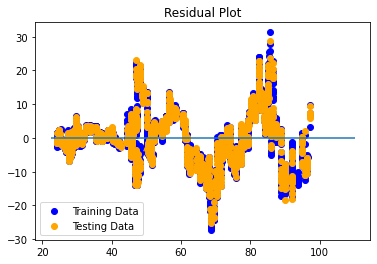

In [80]:
# Plot the Residuals for the Training and Testing data
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [81]:
# Linear Regression: X_test predictions to variable
predictions = model.predict(X_test)

#### R2 Score is a very popular metric used for evaluating the performance of linear regression models. Where R2 Score is between 0 and 1, the closer to 1, the better the regression fit.
#### Use MSE or MAE when comparing two or more models, the lower the value of MSE or MAE, the better. MSE (Mean Square Error): Uses Euclidean distance to calculate the error. MSE gives the magnitude of the error only.

In [82]:
# Used X_test, y_test, and model.predict(X_test) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 61.34409306635273, R2: 0.8798150520209602


#### Lasso regression imposes a constraint on the model parameters that causes regression coefficients for some variables to shrink toward zero. It comes with a parameter, alpha , and the higher the alpha , the more feature coefficients are zero. When alpha is 0 , Lasso regression produces the same coefficients as a linear regression.

In [83]:
# LASSO model
# Note: Used an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train, y_train)

predictions = lasso.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = lasso.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 61.347139259358855, R2: 0.8798090839394437


In [84]:
# Ridge model
# Note: Used an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train, y_train)

predictions = ridge.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = ridge.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 61.344094290294244, R2: 0.8798150496230219


In [85]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train, y_train)

predictions = elasticnet.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 61.34839195098993, R2: 0.8798066296741511


# Hyperparameter Tuning

In [86]:
y_target = df_stock_less1["Close"]
y_target.shape

(5722,)

In [87]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_target, random_state=1)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4291, 3) (4291,)
(1431, 3) (1431,)


In [88]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(4291, 3) (4291,)
(1431, 3) (1431,)


#### GridSearchCV and RandomizedSearchCV are techniques to evaluate models for a given hyperparameter vector using cross-validation, hence the “CV” suffix of the class name.
#### We are executing many models together is to find which machine learning model works best for this particular dataset.

In [89]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [90]:
regressors = [
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [91]:
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

RandomForestRegressor()
	Training time: 0.388s
	Prediction time: 0.019s
	Explained variance: 0.9920936836296876
	Mean absolute error: 1.4130025055414337
	R2 score: 0.9920905593215052

DecisionTreeRegressor()
	Training time: 0.003s
	Prediction time: 0.001s
	Explained variance: 0.9919328426334519
	Mean absolute error: 1.419618018379329
	R2 score: 0.9919280622218712

KNeighborsRegressor()
	Training time: 0.007s
	Prediction time: 0.012s
	Explained variance: 0.99074128823688
	Mean absolute error: 1.5060434454227811
	R2 score: 0.9907401578413497

GradientBoostingRegressor()
	Training time: 0.141s
	Prediction time: 0.004s
	Explained variance: 0.9888253469112388
	Mean absolute error: 1.7843522691973144
	R2 score: 0.9888067960327062

KNeighborsRegressor()
	Training time: 0.004s
	Prediction time: 0.005s
	Explained variance: 0.99074128823688
	Mean absolute error: 1.5060434454227811
	R2 score: 0.9907401578413497

ExtraTreesRegressor()
	Training time: 0.213s
	Prediction time: 0.023s
	Explained vari

#### By comparing these results, we can quickly see that RandomForestRegressor and DecisionTreeRegressor are the best models for our data
#### Machine learning models have parameters, which are the internal coefficients set by training or optimizing the model on a training dataset.
#### Parameters are different from hyperparameters. Parameters are learned automatically; hyperparameters are set manually to help guide the learning process.

In [92]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [93]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [94]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [95]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [96]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 1.4159 degrees.
Accuracy = 97.51%.
Model Performance
Average Error: 1.4126 degrees.
Accuracy = 97.51%.
Improvement of 0.01%.


In [97]:
# Hyperparameter tuning has not improved accuracy significantly

In [98]:
model_rfr = RandomForestRegressor()
model_rfr.fit(X_train, y_train)
y_test_pred = model_rfr.predict(X_test)
y_test_pred

array([ 54.36741182, 101.3198119 ,  58.39737818, ...,  30.84479455,
        77.49775958,  49.06835488])

In [99]:
#RandomForestRegressor Residual showing difference actual vs predicted
residual_dtr = pd.DataFrame([model_rfr.predict(X_train),y_train,(model_rfr.predict(X_train)-y_train)])
residual_dtr.tail

<bound method NDFrame.tail of         0          1          2          3          4          5     \
0  83.293854  51.185144  75.459958  27.004758  79.634503  46.784111   
1  85.940002  51.142906  75.610001  27.594494  75.589996  46.746727   
2  -2.646148   0.042238  -0.150043  -0.589736   4.044507   0.037384   

        6          7          8          9     ...       4281       4282  \
0  28.611898  44.032974  32.096132  27.325354  ...  75.459958  27.566853   
1  28.644802  44.270145  31.927019  29.042646  ...  77.800003  27.869005   
2  -0.032904  -0.237171   0.169113  -1.717292  ...  -2.340045  -0.302152   

        4283       4284       4285       4286       4287       4288  \
0  79.837348  51.185144  50.262451  26.537301  63.084543  79.634503   
1  79.040001  52.873531  50.178135  30.355534  58.990002  81.677467   
2   0.797347  -1.688387   0.084316  -3.818233   4.094541  -2.042964   

        4289       4290  
0  29.876013  63.084543  
1  30.972193  61.240002  
2  -1.096180   1.

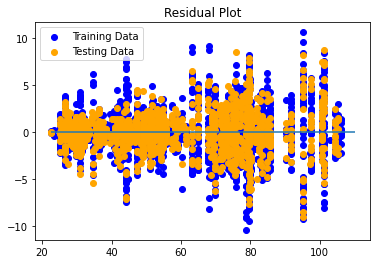

In [100]:
# Make predictions using fitted model
predictions1 = model_rfr.predict(X_test)

# Plotted the difference between the model predicted values and actual y values, versus the model predicted values
plt.scatter(model_rfr.predict(X_train), y_train - model_rfr.predict(X_train), c="blue", label="Training Data")
plt.scatter(model_rfr.predict(X_test), y_test - model_rfr.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()

# Save the Model

In [101]:
import pickle
filename = 'finalcba_model_rfr.sav'
pickle.dump(model, open(filename, 'wb'))
model_in_rfr = pickle.load(open(filename, 'rb'))

In [102]:
# from joblib import dump,load
# model_in_rfr = load('cba_model_rfr.sav')

In [103]:
rba = float(0.85)
fed = float(1.75)
cpi = float(125.00)
input =40
rfr=[]

def randomforest(rba,fed,cpi):
    for i in range(0,input):
      rfr.append([rba,fed,cpi])
      np.round_(rfr,2,out = None) 
      df = pd.DataFrame(rfr, columns = ['RBA','FED',"CPI"])
      df.round(2)
      pred_rf=model_in_rfr.predict(df)
      df['Prediction'] = pred_rf
      df['Prediction'] = df['Prediction'].astype(float).round(2)
      rba+=0.01
      fed+=0.01
      cpi+=0.01
      print(df)
    my_rforest = df.to_dict(orient='records')
    for dict_value in my_rforest:
      for k, v in dict_value.items():
        dict_value[k] = round(v, 2)
    return my_rforest
# print(my_rforest)
my_rf = randomforest(rba,fed,cpi)
print(my_rf)


    RBA   FED    CPI  Prediction
0  0.85  1.75  125.0       97.08
    RBA   FED     CPI  Prediction
0  0.85  1.75  125.00       97.08
1  0.86  1.76  125.01       97.10
    RBA   FED     CPI  Prediction
0  0.85  1.75  125.00       97.08
1  0.86  1.76  125.01       97.10
2  0.87  1.77  125.02       97.12
    RBA   FED     CPI  Prediction
0  0.85  1.75  125.00       97.08
1  0.86  1.76  125.01       97.10
2  0.87  1.77  125.02       97.12
3  0.88  1.78  125.03       97.14
    RBA   FED     CPI  Prediction
0  0.85  1.75  125.00       97.08
1  0.86  1.76  125.01       97.10
2  0.87  1.77  125.02       97.12
3  0.88  1.78  125.03       97.14
4  0.89  1.79  125.04       97.15
    RBA   FED     CPI  Prediction
0  0.85  1.75  125.00       97.08
1  0.86  1.76  125.01       97.10
2  0.87  1.77  125.02       97.12
3  0.88  1.78  125.03       97.14
4  0.89  1.79  125.04       97.15
5  0.90  1.80  125.05       97.17
    RBA   FED     CPI  Prediction
0  0.85  1.75  125.00       97.08
1  0.86  1.76  1

In [104]:
rba = float(0.85)
fed = float(1.75)
cpi = float(125.00)
def rforest(rba,fed,cpi):
    dtr =[[rba,fed,cpi]]
    df = pd.DataFrame (dtr, columns = ['RBA','FED',"CPI"])
    pred_dtr=model_in_rfr.predict(df)
    df['Prediction'] = pred_dtr
    print(df)
    df_dict = df.to_dict(orient='records')
    return pred_dtr
Pred_rf = rforest(rba,fed,cpi)
print(Pred_rf)

    RBA   FED    CPI  Prediction
0  0.85  1.75  125.0   97.076865
[97.07686528]


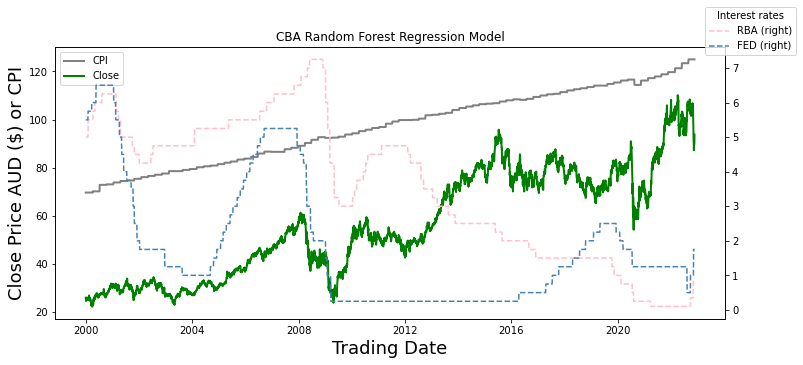

In [105]:
x = np.arange(2000,2024,4)
ax = df_stock_less1.plot(y=["CPI","Close"], figsize=(12, 5),color=['grey','green'],linewidth=2)
df_stock_less1.plot(y=["RBA","FED"],secondary_y=True, ax=ax,color=['pink','steelblue'],linestyle='dashed')
plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=-4, title="Interest rates")
ax.legend(loc='upper left')
ax.set_xticks([0,1000,2000,3000,4000,5000])
ax.set_xticklabels(x, rotation=0)
ax.set_title('CBA Random Forest Regression Model')
ax.set_xlabel('Trading Date', fontsize=18)
ax.set_ylabel('Close Price AUD ($) or CPI', fontsize=18)
plt.savefig('../../static/data/images/cba_tree.png')

#Save predicted error to MongoDB

In [106]:
# Module used to connect Python with MongoDb
import pymongo

In [107]:
# The default port used by MongoDB is 27017
# https://docs.mongodb.com/manual/reference/default-mongodb-port/
conn = 'mongodb://localhost:27017'
client = pymongo.MongoClient(conn)

# Define the 'sharesDB' database in Mongo
db = client.sharesDB.companys

In [109]:
# query the companys collection
companys = db.find()
# see change in the collection
for company in companys:
    print(company)

{'_id': ObjectId('62bbaebc940901ee4c7522f2'), 'model': 'LSTM', 'name': 'BHP', 'date': '28/06/2022', 'predicted': 41, 'actual': 42, 'differece': -1, 'rmse': 0.53768}
{'_id': ObjectId('62bbb5d8d8978fe40ad3d64c'), 'model': 'LSTM', 'name': 'CBA', 'date': '28/06/2022', 'predicted': 91, 'actual': 93, 'differece': -2, 'rmse': 0.33103}
{'_id': ObjectId('62bbc7cb193d5e9ca1048e2b'), 'model': 'LSTM', 'name': 'NAB', 'date': '28/06/2022', 'predicted': 27, 'actual': 27, 'differece': 0, 'rmse': 0.32984}
{'_id': ObjectId('62bbca7acc73d07c34c73fbb'), 'model': 'LSTM', 'name': 'WBC', 'date': '28/06/2022', 'predicted': 19, 'actual': 19, 'differece': 0, 'rmse': 0.15231}
{'_id': ObjectId('62bbcb598f600c8c92330dad'), 'model': 'LSTM', 'name': 'CSL', 'date': '28/06/2022', 'predicted': 259, 'actual': 274, 'differece': -15, 'rmse': 6.26059}


WriteError: BSON field 'collation.name' is an unknown field., full error: {'index': 0, 'code': 40415, 'errmsg': "BSON field 'collation.name' is an unknown field."}

In [110]:
#save last price actual to variable
actual_price = df_stock3.iloc[-1,4]
actual_date = df_stock3.iloc[-1,0] 
actual_price = int(actual_price)
print(actual_price,actual_date,base_accuracy)


93 28/06/2022 97.50693821928598


In [114]:
# Set keys and values of company
name = 'CBA'
predicted = int(Pred_rf)
difference = Pred_rf-actual_price
print(f'date {actual_date},predicted {predicted},actual {actual_price}, difference {difference[0]}, accuracy {round(base_accuracy,2)}')

date 28/06/2022,predicted 97,actual 93, difference 4.07686528417301, accuracy 97.50694


In [124]:
# Delete a document from a collection
db.delete_one(
    {'model': 'RFR','name': name}
)


In [125]:
# Insert a document into the 'companys' collection
db.insert_one(
    {
      'model': 'RFR',
      'name': name,
      'date': actual_date,
      'predicted': predicted,
      'actual': actual_price,
      'differece': difference[0],
      'accuracy': round(base_accuracy,2)        
    }
)

# query the classroom collection
companys = db.find()

# see change in collection
for company in companys:
    print(company)

{'_id': ObjectId('62bbaebc940901ee4c7522f2'), 'model': 'LSTM', 'name': 'BHP', 'date': '28/06/2022', 'predicted': 41, 'actual': 42, 'differece': -1, 'rmse': 0.53768}
{'_id': ObjectId('62bbb5d8d8978fe40ad3d64c'), 'model': 'LSTM', 'name': 'CBA', 'date': '28/06/2022', 'predicted': 91, 'actual': 93, 'differece': -2, 'rmse': 0.33103}
{'_id': ObjectId('62bbc7cb193d5e9ca1048e2b'), 'model': 'LSTM', 'name': 'NAB', 'date': '28/06/2022', 'predicted': 27, 'actual': 27, 'differece': 0, 'rmse': 0.32984}
{'_id': ObjectId('62bbca7acc73d07c34c73fbb'), 'model': 'LSTM', 'name': 'WBC', 'date': '28/06/2022', 'predicted': 19, 'actual': 19, 'differece': 0, 'rmse': 0.15231}
{'_id': ObjectId('62bbcb598f600c8c92330dad'), 'model': 'LSTM', 'name': 'CSL', 'date': '28/06/2022', 'predicted': 259, 'actual': 274, 'differece': -15, 'rmse': 6.26059}
{'_id': ObjectId('62bbdd4da0c646d0f72fcefa'), 'model': 'RFR', 'name': 'CBA', 'date': '28/06/2022', 'predicted': 97, 'actual': 93, 'differece': 4.07686528417301, 'accuracy': 9